# **Data Science for Business SCH-MGMT 657 (164028) FA25**

# Predicting Medical Insurance Premiums Using Machine Learning

## **Introduction**

Health insurance premiums are shaped by a wide range of personal health factors, yet the way these factors interact is often more complex than it appears. Understanding how age, BMI, chronic illnesses, surgical history, and family medical risks come together to influence premium costs is essential for building fair and accurate pricing systems. This project uses a detailed health dataset to explore how these variables relate to one another and to the final premium amount an individual is likely to pay.

The analysis begins with a thorough exploration of the data to identify important patterns, including which health conditions tend to drive premiums up and how demographic variables influence risk. Because these relationships are not purely linear, the project moves beyond traditional regression techniques and uses a nonlinear machine learning model XGBoost to better capture the underlying structure of the data. This model helps reveal which factors matter most and provides reliable predictions of expected premium levels.

By combining exploratory analysis with modern predictive modeling, the project aims to provide a clearer picture of how different elements of a person’s health profile translate into insurance costs. The insights gained from this work contribute to more informed, transparent, and data-driven decision making in health insurance pricing.




#Team Members:

Vineet Reddy Saddi

Shiva Kotagiri

Svamsee Addaguduru

Prakash Sai Alla

Saleeq Sunil

In the first step, the dataset is imported using the pandas library, which provides powerful data manipulation tools.
The CSV file Medicalpremium.csv is read from Google Drive into a pandas DataFrame named df.
This DataFrame will serve as the foundation for all further preprocessing and exploratory data analysis.

In [ ]:
import pandas as pd
import requests
from io import StringIO

orig_url = "https://drive.google.com/file/d/1IQs4CNhQU1WMSC91ViTG__RhM4PK-guv/view?usp=sharing"
file_id = orig_url.split('/')[-2]

dwn_url = 'https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
df = pd.read_csv(csv_raw)
df.head()


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


Displays the dataset’s structure, data types, and a quick statistical summary to understand the overall composition and detect any potential irregularities early.

In [ ]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [ ]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


Data Preprocessing and Feature Engineering

This section focuses on preparing the dataset for modeling through data cleaning and transformation. It includes handling missing values, creating new variables such as BMI and BMI_Age, categorizing continuous features like Age and BMI, encoding categorical variables, and removing outliers. These steps ensure the data is consistent, structured, and ready for accurate insurance premium prediction.

This cell checks for null or missing entries across all columns to ensure data completeness before moving forward with preprocessing and analysis.

In [ ]:
df.isnull().sum()


,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


A new feature BMI is created using height and weight to represent an individual’s body fatness. This variable helps analyze how physical attributes relate to medical insurance premiums.

In [ ]:
df['BMI'] = df['Weight'] / ((df['Height']/100) ** 2)
df[['Height', 'Weight', 'BMI']].head()


,Height,Weight,BMI
0,155,57,23.725286
1,180,73,22.530864
2,158,59,23.634033
3,183,93,27.770313
4,166,88,31.934969


In [ ]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969
...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109


The continuous Age variable is categorized into distinct age groups to simplify analysis and visualize how insurance premiums vary across different age ranges.

In [ ]:
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [ ]:
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)
# Check new columns
print(df.columns)

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'BMI', 'AgeGroup_26-35', 'AgeGroup_36-45', 'AgeGroup_46-55',
       'AgeGroup_56-65', 'AgeGroup_65+'],
      dtype='object')


In [ ]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,AgeGroup_26-35,AgeGroup_36-45,AgeGroup_46-55,AgeGroup_56-65,AgeGroup_65+
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,False,True,False,False,False
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,False,False,False,True,False
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,False,True,False,False,False
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,False,False,True,False,False
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562,False,False,False,False,False
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029,False,False,False,True,False
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549,False,False,False,True,False
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109,False,False,True,False,False


The calculated BMI values are grouped into four standard health categories — Underweight, Normal, Overweight, and Obese. This helps in analyzing how different BMI ranges relate to variations in insurance premiums

In [ ]:
def bmi_category(bmi):
    if bmi < 18.5: return 'Underweight'
    elif bmi < 25: return 'Normal'
    elif bmi < 30: return 'Overweight'
    else: return 'Obese'

df['BMICategory'] = df['BMI'].apply(bmi_category)


In [ ]:
bmi_order = {
    'Underweight': 1,
    'Normal': 2,
    'Overweight': 3,
    'Obese': 4
}

df['BMICategory_encoded'] = df['BMICategory'].map(bmi_order)

print(df['BMICategory'].unique())


['Normal' 'Overweight' 'Obese' 'Underweight']


In [ ]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,AgeGroup_26-35,AgeGroup_36-45,AgeGroup_46-55,AgeGroup_56-65,AgeGroup_65+,BMICategory,BMICategory_encoded
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,False,True,False,False,False,Normal,2
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,False,False,False,True,False,Normal,2
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,False,True,False,False,False,Normal,2
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,False,False,True,False,False,Overweight,3
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,False,True,False,False,False,Obese,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562,False,False,False,False,False,Normal,2
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029,False,False,False,True,False,Overweight,3
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549,False,False,False,True,False,Overweight,3
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109,False,False,True,False,False,Overweight,3


The BMI_Age feature combines BMI and Age to capture their joint impact on health risk, while the WeightHeightRatio represents body proportionality to provide additional physical insights.

In [ ]:
df['BMI_Age'] = df['BMI'] * df['Age']

A new feature WeightHeightRatio was created by dividing weight by height to capture the proportionality between the two. This ratio helps represent body structure and can provide additional insights into how an individual’s physical attributes may influence insurance premiums.

In [ ]:
df['WeightHeightRatio'] = df['Weight'] / df['Height']
df[['Weight', 'Height', 'WeightHeightRatio']].head()

,Weight,Height,WeightHeightRatio
0,57,155,0.367742
1,73,180,0.405556
2,59,158,0.373418
3,93,183,0.508197
4,88,166,0.530120


In [ ]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,...,BMI,AgeGroup_26-35,AgeGroup_36-45,AgeGroup_46-55,AgeGroup_56-65,AgeGroup_65+,BMICategory,BMICategory_encoded,BMI_Age,WeightHeightRatio
0,45,0,0,0,0,155,57,0,0,0,...,23.725286,False,True,False,False,False,Normal,2,1067.637877,0.367742
1,60,1,0,0,0,180,73,0,0,0,...,22.530864,False,False,False,True,False,Normal,2,1351.851852,0.405556
2,36,1,1,0,0,158,59,0,0,1,...,23.634033,False,True,False,False,False,Normal,2,850.825188,0.373418
3,52,1,1,0,1,183,93,0,0,2,...,27.770313,False,False,True,False,False,Overweight,3,1444.056257,0.508197
4,38,0,0,0,1,166,88,0,0,1,...,31.934969,False,True,False,False,False,Obese,4,1213.528814,0.530120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,...,23.458562,False,False,False,False,False,Normal,2,422.254123,0.396450
982,64,1,1,0,0,153,70,0,0,3,...,29.903029,False,False,False,True,False,Overweight,3,1913.793840,0.457516
983,56,0,1,0,0,155,71,0,0,1,...,29.552549,False,False,False,True,False,Overweight,3,1654.942768,0.458065
984,47,1,1,0,0,158,73,1,0,1,...,29.242109,False,False,True,False,False,Overweight,3,1374.379106,0.462025


The PremiumPrice variable was log-transformed to reduce skewness and make the distribution more normal-like. This helps improve the performance and stability of regression models by minimizing the effect of extreme values.

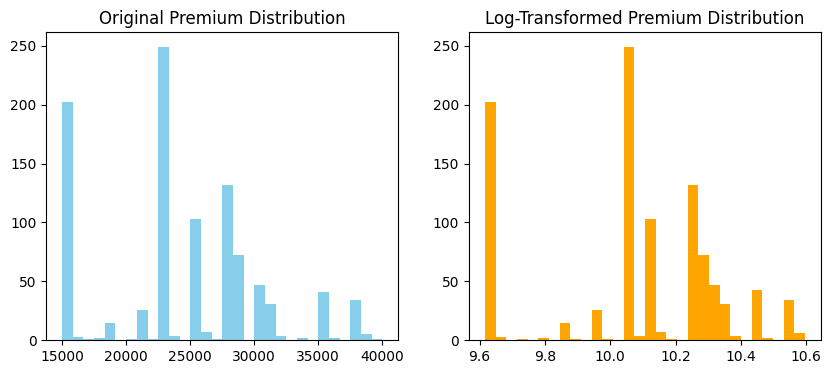

In [ ]:
import numpy as np
df['LogPremium'] = np.log(df['PremiumPrice'])

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['PremiumPrice'], bins=30, color='skyblue')
plt.title('Original Premium Distribution')

plt.subplot(1,2,2)
plt.hist(df['LogPremium'], bins=30, color='orange')
plt.title('Log-Transformed Premium Distribution')
plt.show()


Boxplots were used to visually identify outliers in key numeric variables such as Age, BMI, BMI_Age, and PremiumPrice. Detecting and handling these outliers ensures a cleaner dataset and improves model reliability.

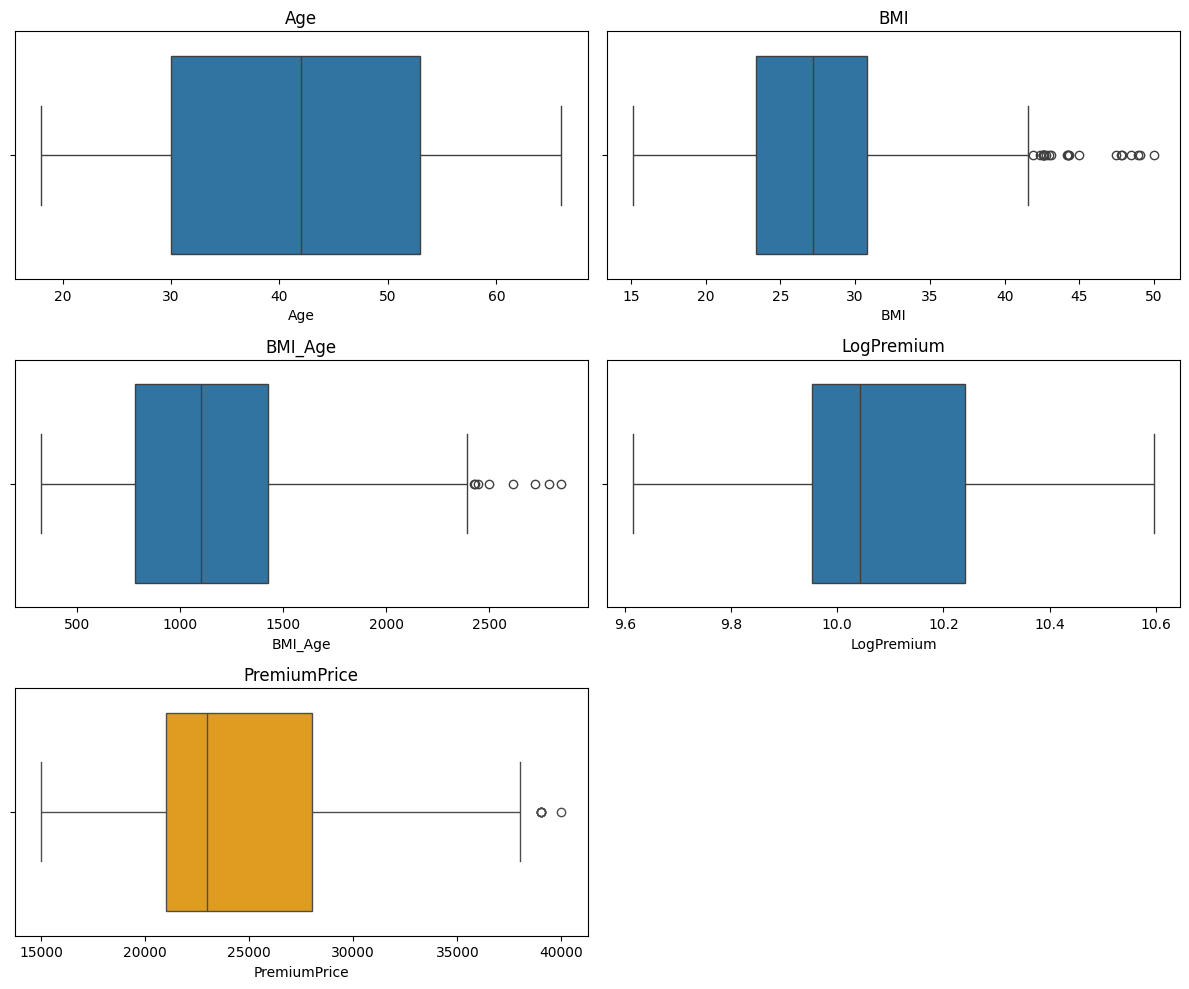

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

sns.boxplot(x=df['Age'], ax=axes[0,0])
axes[0,0].set_title('Age')

sns.boxplot(x=df['BMI'], ax=axes[0,1])
axes[0,1].set_title('BMI')

sns.boxplot(x=df['BMI_Age'], ax=axes[1,0])
axes[1,0].set_title('BMI_Age')

sns.boxplot(x=df['LogPremium'], ax=axes[1,1])
axes[1,1].set_title('LogPremium')

sns.boxplot(x=df['PremiumPrice'], ax=axes[2,0], color='orange')
axes[2,0].set_title('PremiumPrice')

axes[2,1].axis('off')

plt.tight_layout()
plt.show()


Outliers in BMI and PremiumPrice were detected and removed using the Interquartile Range (IQR) method with a factor of 1.0. This process helps eliminate extreme values that could distort statistical relationships and improve model accuracy.

In [ ]:
def remove_outliers(df, column, factor=1.0):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    df = df[(df[column] >= lower) & (df[column] <= upper)]
    return df

df = remove_outliers(df, 'BMI', factor=1.0)
df = remove_outliers(df, 'PremiumPrice', factor=1.0)

print("New shape:", df.shape)


New shape: (895, 22)


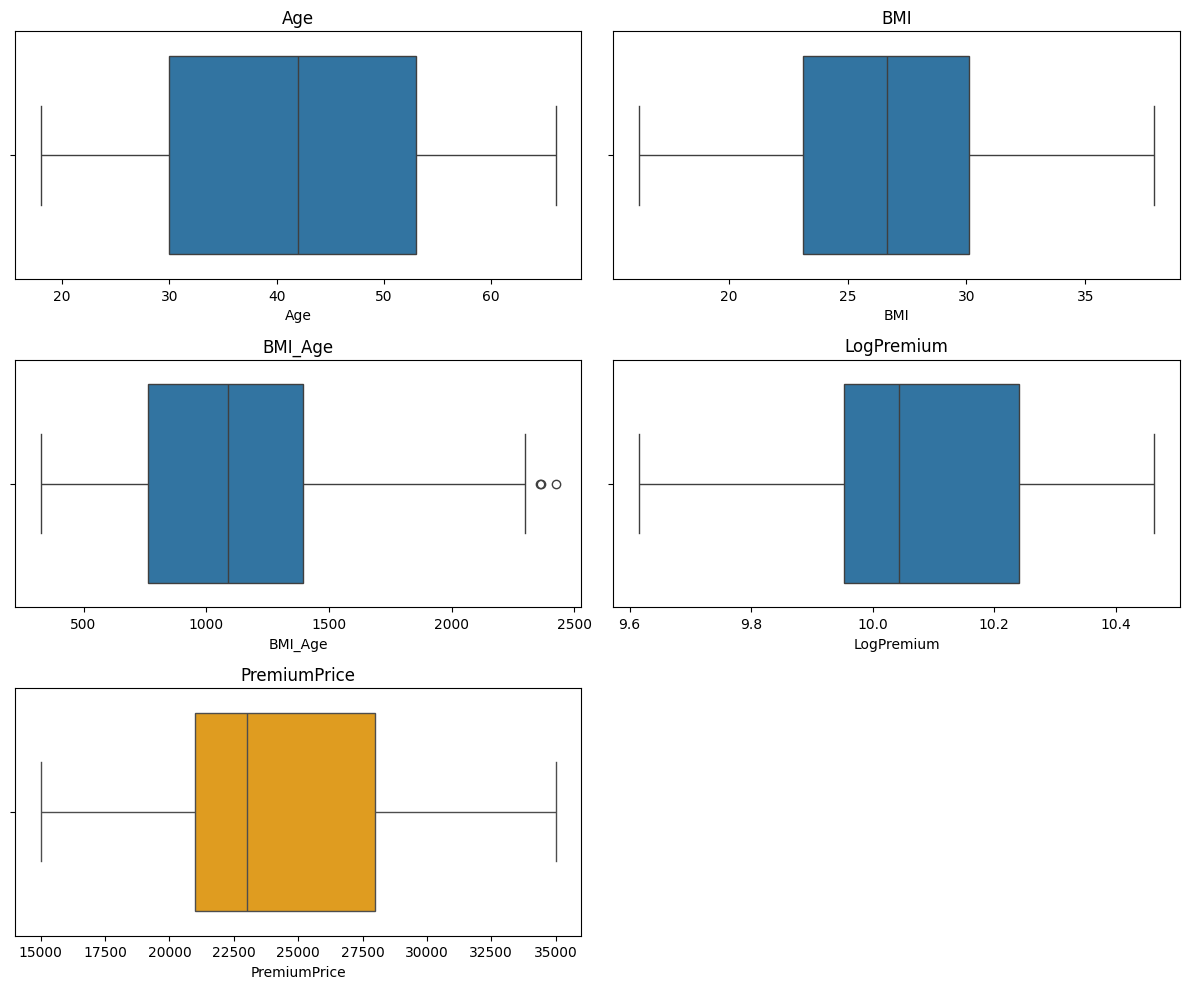

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

sns.boxplot(x=df['Age'], ax=axes[0,0])
axes[0,0].set_title('Age')

sns.boxplot(x=df['BMI'], ax=axes[0,1])
axes[0,1].set_title('BMI')

sns.boxplot(x=df['BMI_Age'], ax=axes[1,0])
axes[1,0].set_title('BMI_Age')

sns.boxplot(x=df['LogPremium'], ax=axes[1,1])
axes[1,1].set_title('LogPremium')

sns.boxplot(x=df['PremiumPrice'], ax=axes[2,0], color='orange')
axes[2,0].set_title('PremiumPrice')

axes[2,1].axis('off')
plt.tight_layout()
plt.show()


##Exploratory Data Analysis (EDA)

This section explores the dataset to uncover key patterns, trends, and relationships between variables. It includes visualizations such as histograms for quantitative variables, bar charts for categorical variables, and correlation analysis to understand how different features influence the insurance premium.

This step lists all the unique values present in every column of the dataset. It helps identify categorical variables, detect inconsistent entries, and understand the range of possible values for each feature.

In [ ]:
for col in df.columns:
    print(col, df[col].unique())


Age [45 60 36 52 38 30 33 23 48 66 24 46 18 42 57 21 49 20 35 31 22 28 26 64
 50 44 58 43 25 54 63 61 41 55 19 40 32 27 53 34 59 29 47 39 37 51 56 62
 65]
Diabetes [0 1]
BloodPressureProblems [0 1]
AnyTransplants [0 1]
AnyChronicDiseases [0 1]
Height [155 180 158 183 166 160 150 181 169 182 175 186 178 184 149 154 156 163
 172 162 153 168 161 157 147 173 179 165 174 185 177 164 148 170 187 152
 167 159 188 151 171 176 146 145]
Weight [ 57  73  59  93  88  69  54  79  74  67  97  76  68  82  61  81  92  83
  58  96  85  55  91  78  56  77  63  75  72  70  80  60  53  84  64  95
  66  62  86  65  90 116  98 104  89  71 106  99 100 109 107 114 103 124
  87  94  52  51 101]
KnownAllergies [0 1]
HistoryOfCancerInFamily [0 1]
NumberOfMajorSurgeries [0 1 2 3]
PremiumPrice [25000 29000 23000 28000 21000 15000 35000 30000 32000 24000 31000 19000
 26000 18000 34000 20000 16000 27000 17000]
BMI [23.72528616 22.5308642  23.63403301 27.77031264 31.93496879 26.953125
 24.         24.11403803 25.9094

Histograms are plotted for numerical features such as Age, Height, Weight, and PremiumPrice to visualize their distributions. This helps identify the spread, skewness, and presence of any potential outliers in the data.

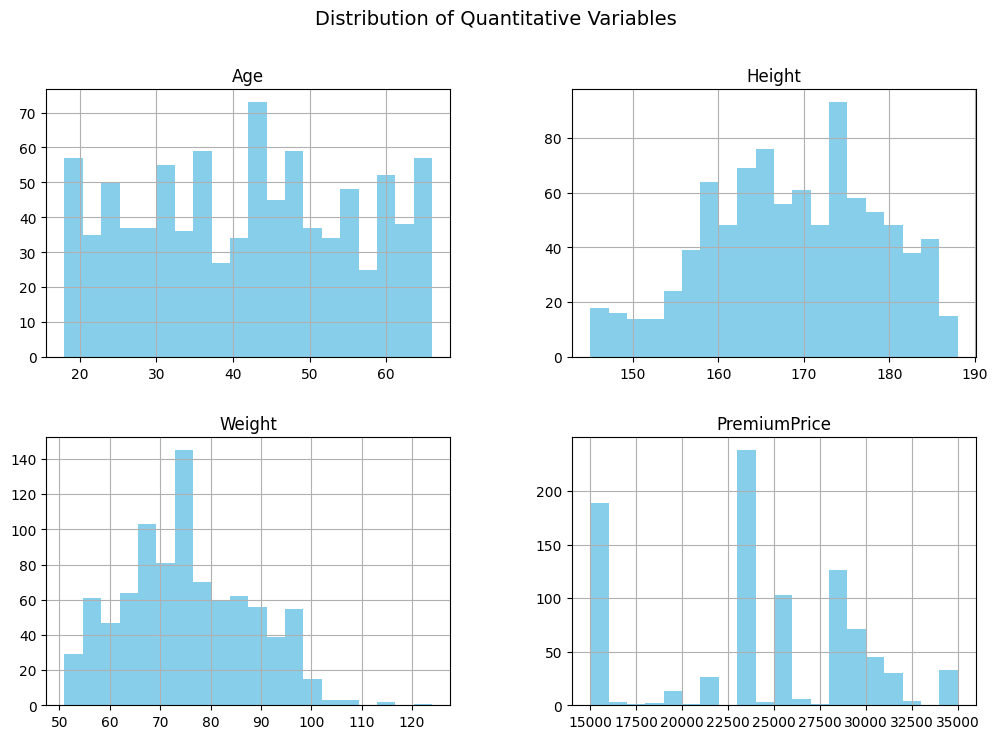

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = ['Age', 'Height', 'Weight', 'PremiumPrice']

df[num_cols].hist(bins=20, figsize=(12,8), color='skyblue')
plt.suptitle("Distribution of Quantitative Variables", fontsize=14)
plt.show()


Bar plots are created for all categorical features to visualize the frequency of each category. This helps understand the balance of health-related factors such as diabetes, chronic diseases, and history of major surgeries within the dataset.

/tmp/ipython-input-711356791.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


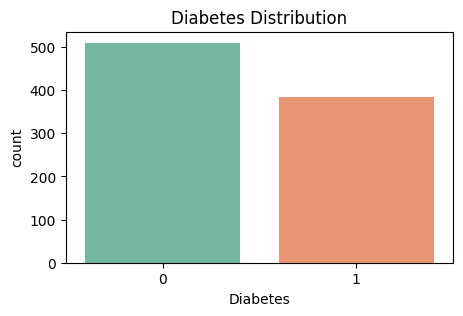

/tmp/ipython-input-711356791.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


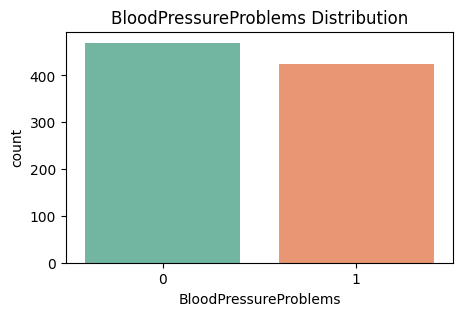

/tmp/ipython-input-711356791.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


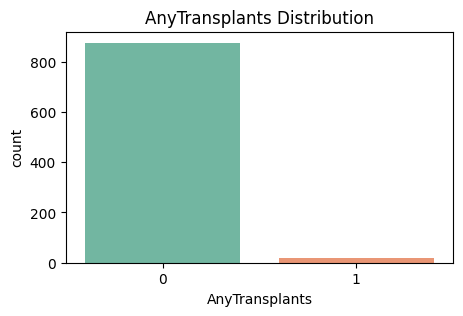

/tmp/ipython-input-711356791.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


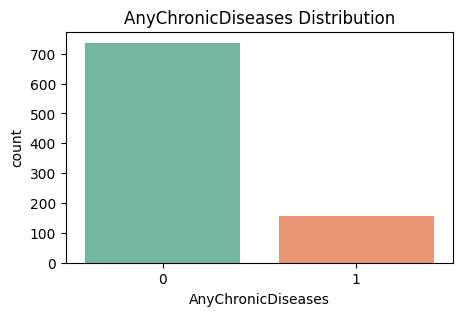

/tmp/ipython-input-711356791.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


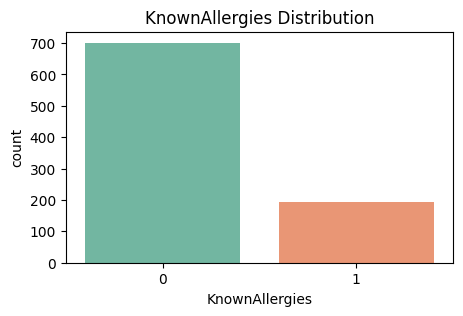

/tmp/ipython-input-711356791.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


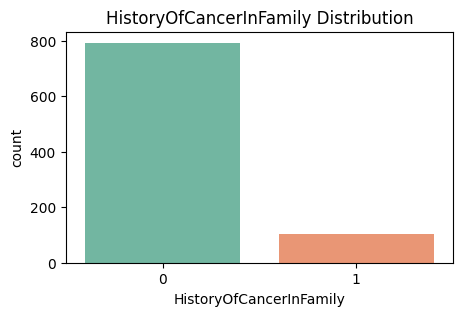

/tmp/ipython-input-711356791.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


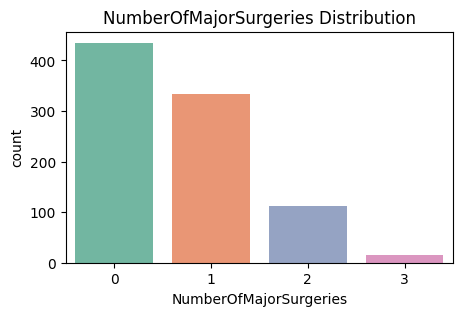

In [ ]:
cat_cols = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
            'AnyChronicDiseases', 'KnownAllergies',
            'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f"{col} Distribution")
    plt.show()


A histogram with a KDE curve is plotted to visualize the distribution of PremiumPrice. This helps identify how insurance premiums are spread across individuals and whether the distribution is skewed or centered around specific values

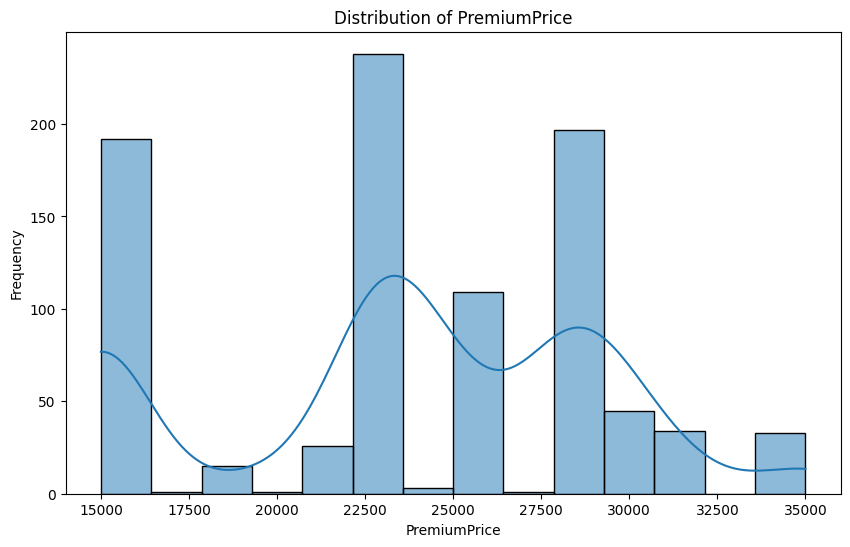

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['PremiumPrice'], kde=True)
plt.title('Distribution of PremiumPrice')
plt.xlabel('PremiumPrice')
plt.ylabel('Frequency')
plt.show()

Scatter plots are drawn to visualize how Age, Height, Weight, and Number of Major Surgeries relate to PremiumPrice. These plots help identify trends or correlations, such as whether premiums tend to increase with age or the number of surgeries.

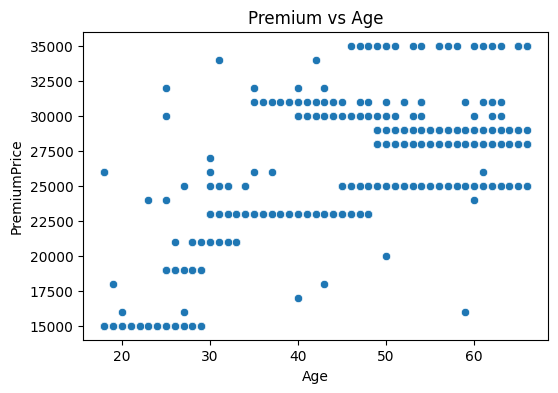

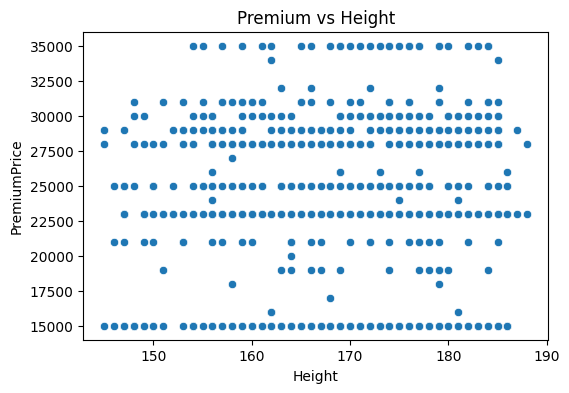

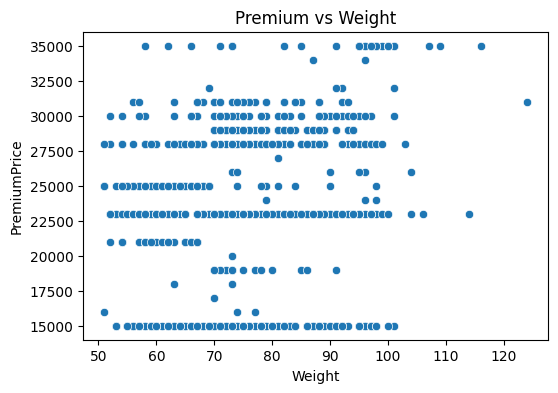

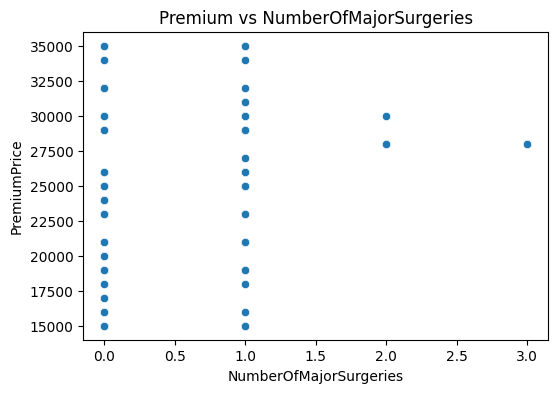

In [ ]:
for col in ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='PremiumPrice', data=df)
    plt.title(f'Premium vs {col}')
    plt.show()


A bar chart is used to show the average insurance premium for each age group. This visualization helps identify how premium amounts vary across different age ranges, revealing whether older individuals tend to pay higher premiums.

/tmp/ipython-input-996547390.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['LogPremium'].mean().plot(kind='bar', color='teal')


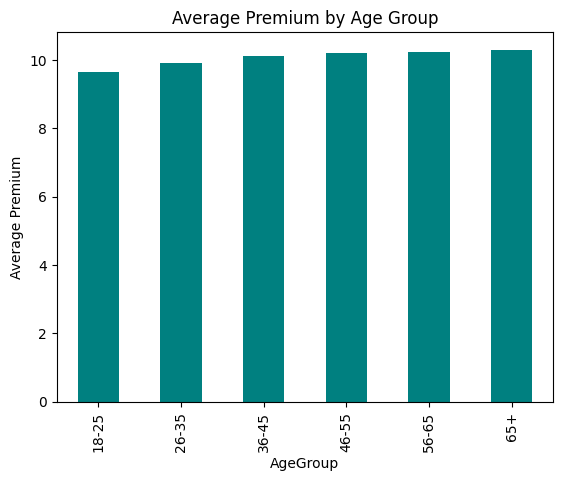

In [ ]:
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Now plot again
df.groupby('AgeGroup')['LogPremium'].mean().plot(kind='bar', color='teal')
plt.ylabel('Average Premium')
plt.title('Average Premium by Age Group')
plt.show()


A histogram with a KDE curve is plotted to visualize how BMI values are distributed across individuals. This helps identify whether most people fall within healthy, underweight, or overweight ranges.

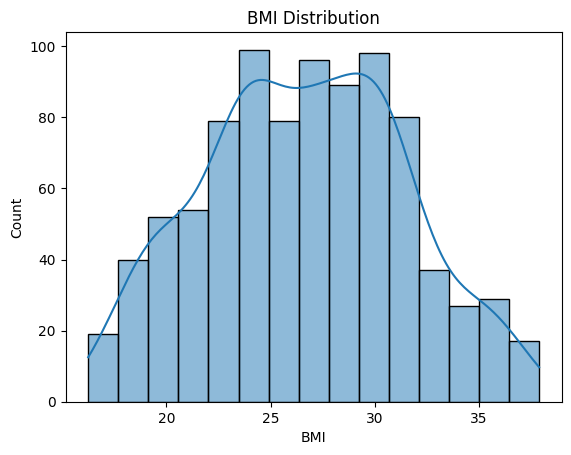

In [ ]:
sns.histplot(df['BMI'], kde=True)
plt.title('BMI Distribution')
plt.show()

A scatter plot is used to examine how BMI influences PremiumPrice. This visualization helps reveal whether individuals with higher BMI tend to pay higher health insurance premiums.

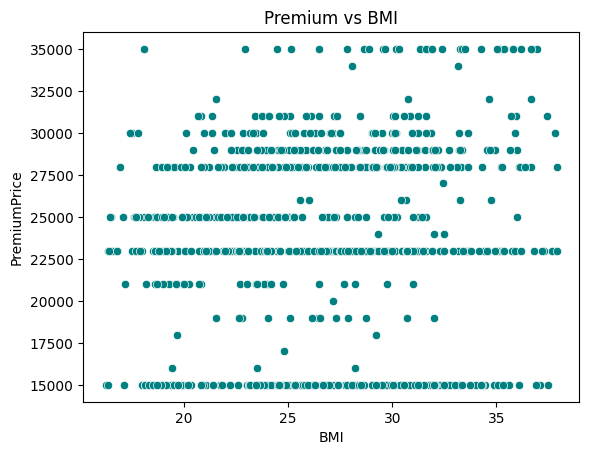

In [ ]:
sns.scatterplot(x='BMI', y='PremiumPrice', data=df, color='teal')
plt.title("Premium vs BMI")
plt.show()

###BOX PLOT
The boxplots illustrate how LogPremium varies across key health-related categorical variables, including chronic diseases, diabetes, transplant history, and BMI category. Clear upward shifts in median LogPremium for several conditions indicate higher expected insurance costs among individuals with chronic illnesses or elevated health-risk profiles.


/tmp/ipython-input-2434857855.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df["LogPremium"], palette="coolwarm")
/tmp/ipython-input-2434857855.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df["LogPremium"], palette="coolwarm")
/tmp/ipython-input-2434857855.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df["LogPremium"], palette="coolwarm")
/tmp/ipython-input-2434857855.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Ass

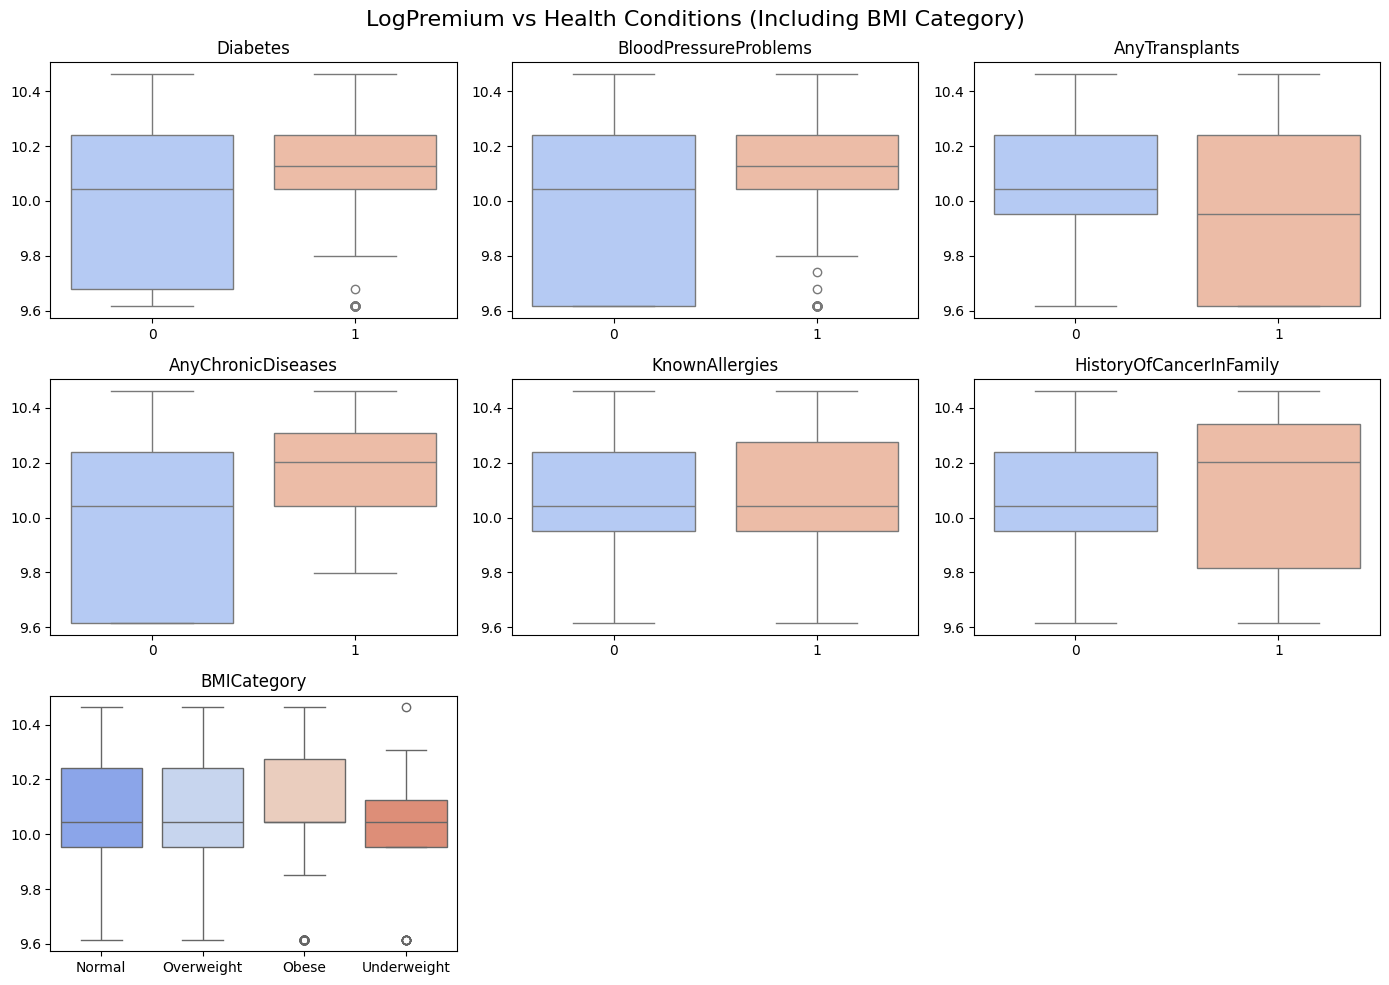

In [ ]:
health_cols = [
    'Diabetes',
    'BloodPressureProblems',
    'AnyTransplants',
    'AnyChronicDiseases',
    'KnownAllergies',
    'HistoryOfCancerInFamily',
    'BMICategory'
]
plt.figure(figsize=(14,10))
for i, col in enumerate(health_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], y=df["LogPremium"], palette="coolwarm")
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")
plt.suptitle("LogPremium vs Health Conditions (Including BMI Category)", fontsize=16)
plt.tight_layout()
plt.show()

The scatterplots with regression lines show the direction and strength of relationships between LogPremium and key numerical predictors such as age, BMI, and number of major surgeries. Age and surgical history display clear upward trends, indicating that premiums increase consistently with higher health-risk indicators.


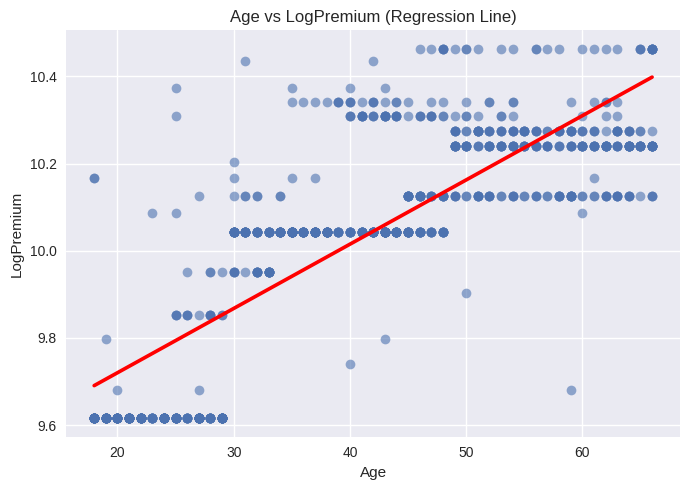

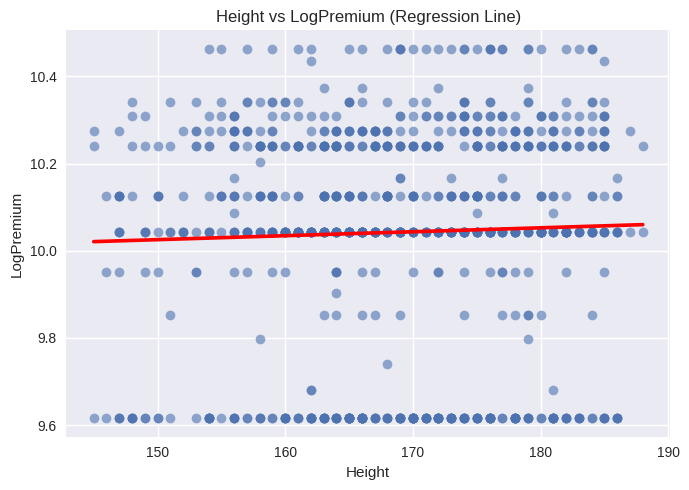

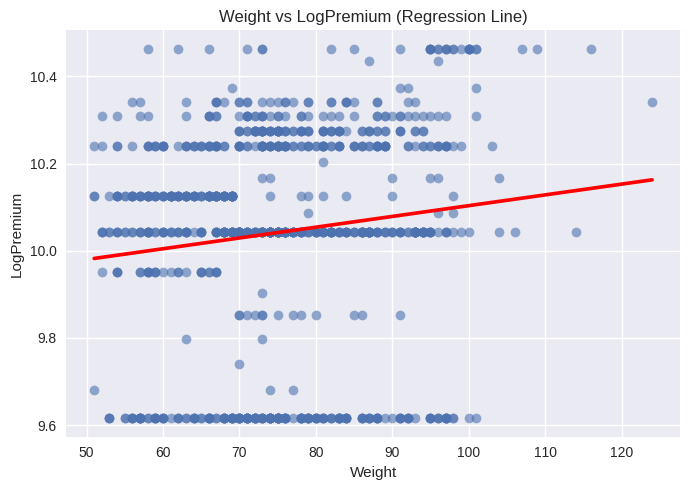

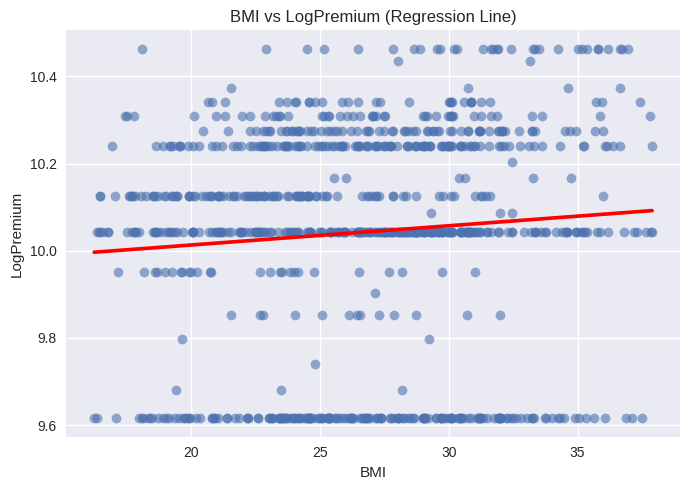

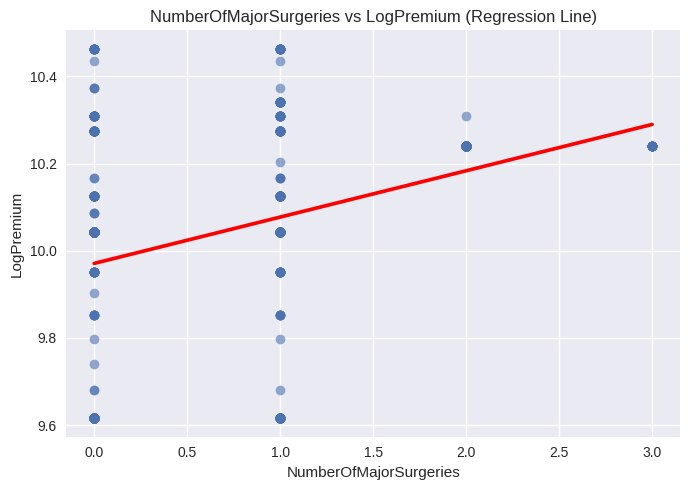

In [ ]:
num_vars = [
    "Age",
    "Height",
    "Weight",
    "BMI",
    "NumberOfMajorSurgeries"
]

plt.style.use("seaborn-v0_8")

for col in num_vars:
    if col in df.columns:
        plt.figure(figsize=(7,5))
        sns.regplot(
            x=df[col],
            y=df["LogPremium"],
            scatter_kws={"alpha":0.6},
            line_kws={"color":"red"},
            ci=None
        )
        plt.title(f"{col} vs LogPremium (Regression Line)")
        plt.xlabel(col)
        plt.ylabel("LogPremium")
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col} not found in dataframe — skipped.")

This scatterplot shows how BMI and Age jointly relate to LogPremium, with color intensity indicating higher predicted premiums. The plot reveals that premiums increase noticeably with age, and the darkest points tend to cluster where both age and BMI are high. This indicates a compounding risk effect, where older individuals with elevated BMI show the highest premium levels.


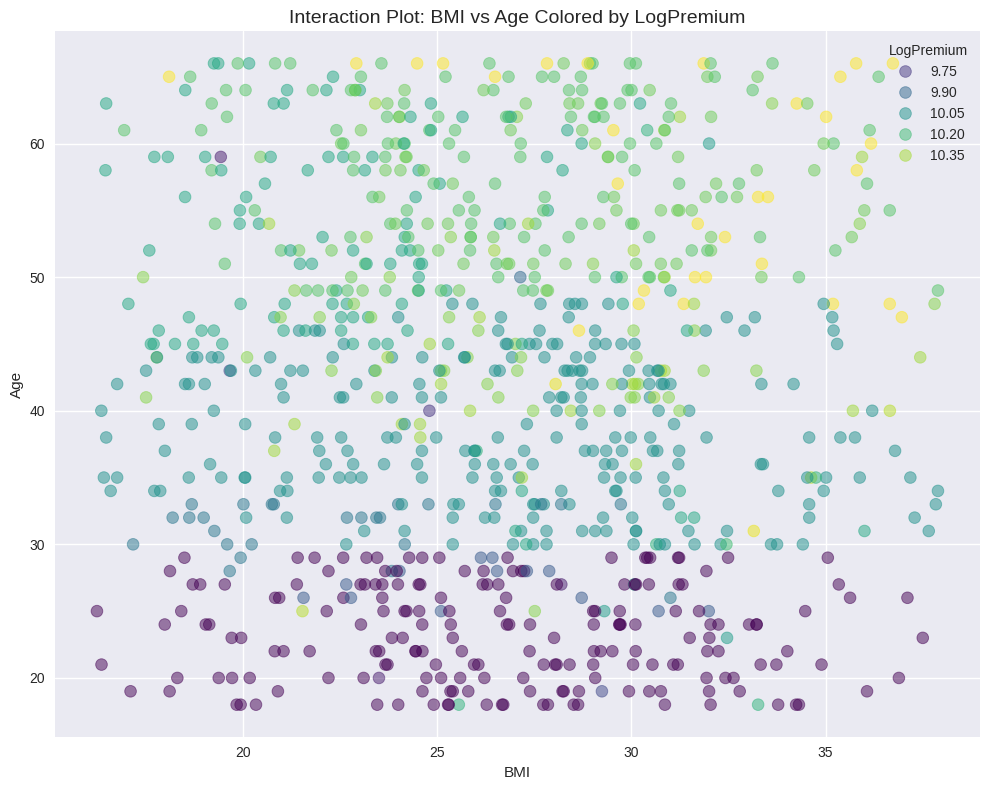

In [ ]:
plt.figure(figsize=(10,8))

sns.scatterplot(
    x=df["BMI"],
    y=df["Age"],
    hue=df["LogPremium"],
    palette="viridis",
    alpha=0.5,
    s=70,
    edgecolor=None
)

plt.title("Interaction Plot: BMI vs Age Colored by LogPremium", fontsize=14)
plt.xlabel("BMI")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

###Correlation Analysis

A correlation heatmap is generated to visualize relationships between numerical features. This helps identify which variables are most strongly associated with PremiumPrice, guiding the selection of meaningful predictors for modeling.

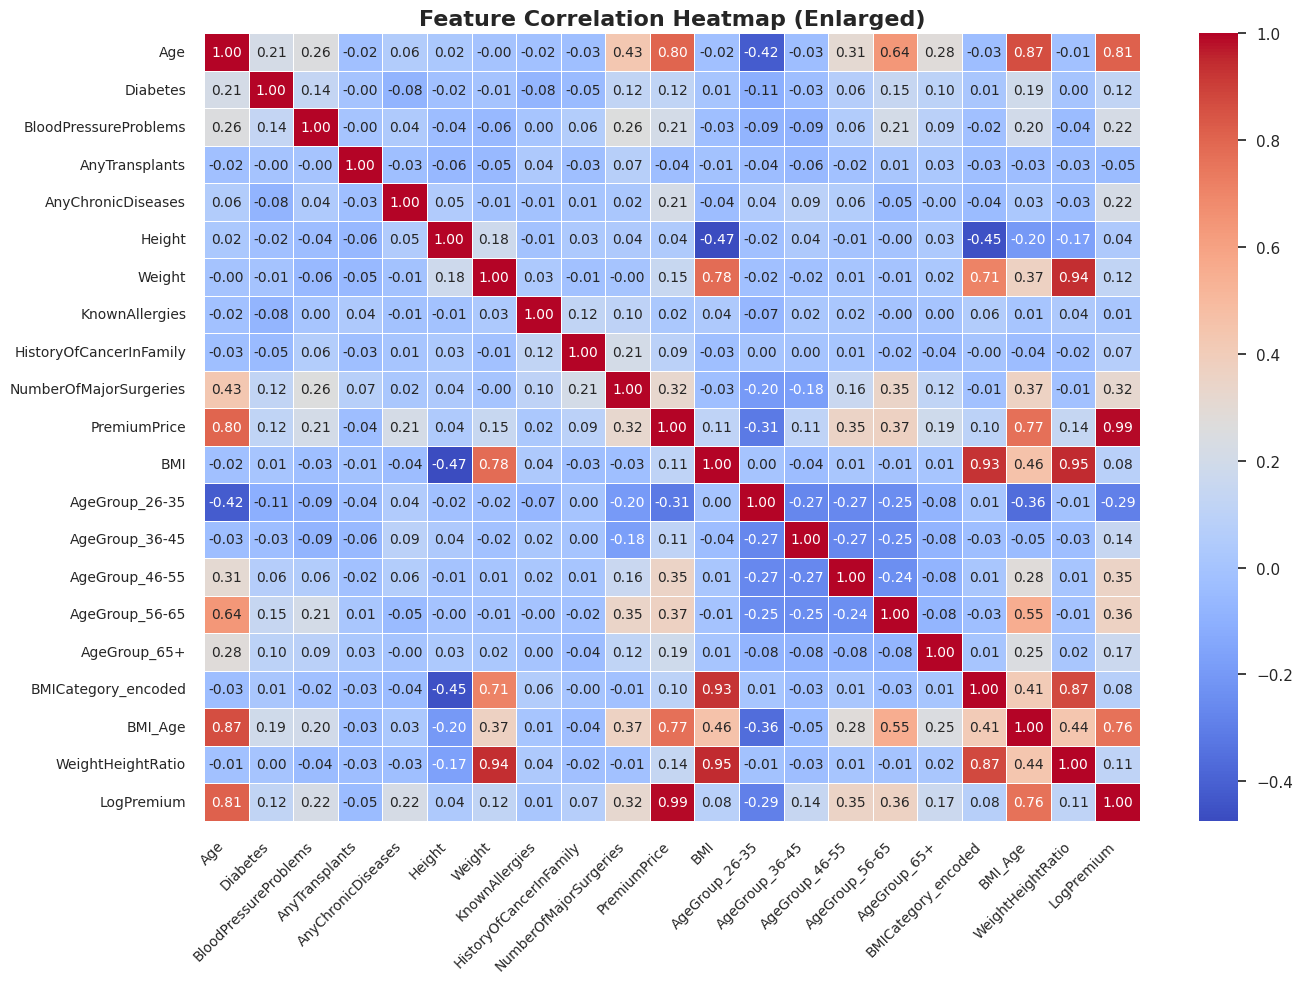

In [ ]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.set(style='white')

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    annot_kws={"size": 10}
)

plt.title('Feature Correlation Heatmap (Enlarged)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


Highly correlated and redundant variables such as Weight, Height, and PremiumPrice were removed to reduce multicollinearity and simplify the model. Only meaningful and independent predictors were retained for the final analysis.

In [ ]:
df = df.drop([
    'WeightHeightRatio',
    'PremiumPrice',
    'Height',
    'Weight',
    'KnownAllergies',
    'AgeGroup_26-35',
    'AgeGroup_36-45',
    'AgeGroup_46-55',
    'AgeGroup_56-65',
    'AgeGroup_65+',
    'AgeGroup',
    'BMICategory'
], axis=1)

print("Remaining columns:\n", df.columns.tolist())


Remaining columns:
 ['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'BMI', 'BMICategory_encoded', 'BMI_Age', 'LogPremium']


In [ ]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,BMICategory_encoded,BMI_Age,LogPremium
0,45,0,0,0,0,0,0,23.725286,2,1067.637877,10.126631
1,60,1,0,0,0,0,0,22.530864,2,1351.851852,10.275051
2,36,1,1,0,0,0,1,23.634033,2,850.825188,10.043249
3,52,1,1,0,1,0,2,27.770313,3,1444.056257,10.239960
4,38,0,0,0,1,0,1,31.934969,4,1213.528814,10.043249
...,...,...,...,...,...,...,...,...,...,...,...
979,24,0,0,0,0,0,0,27.390919,3,657.382045,9.615805
981,18,0,0,0,0,0,0,23.458562,2,422.254123,9.615805
982,64,1,1,0,0,0,3,29.903029,3,1913.793840,10.239960
983,56,0,1,0,0,0,1,29.552549,3,1654.942768,10.275051


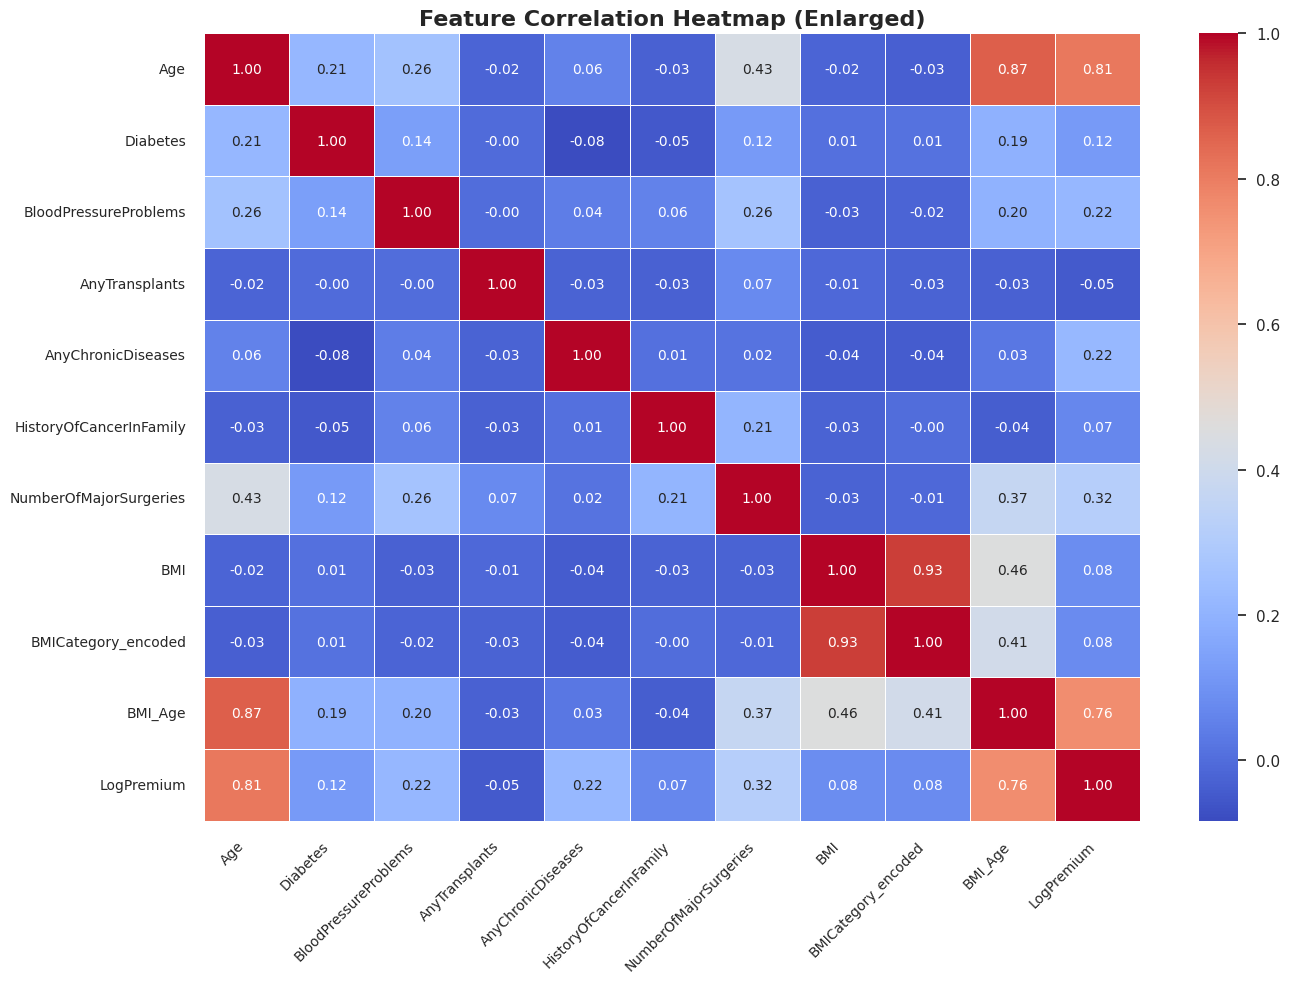

In [ ]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.set(style='white')

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    annot_kws={"size": 10}
)

plt.title('Feature Correlation Heatmap (Enlarged)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


In this step, the independent variables (predictors) are separated from the dependent variable (target).
All features in the dataset except LogPremium are assigned to X, representing the predictors used for modeling.

In [ ]:
# Recreate predictors and target
X = df.drop(['LogPremium'], axis=1)
y = df['LogPremium']

print(X.columns.tolist())


['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'BMI', 'BMICategory_encoded', 'BMI_Age']


In [ ]:
X

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,BMICategory_encoded,BMI_Age
0,45,0,0,0,0,0,0,23.725286,2,1067.637877
1,60,1,0,0,0,0,0,22.530864,2,1351.851852
2,36,1,1,0,0,0,1,23.634033,2,850.825188
3,52,1,1,0,1,0,2,27.770313,3,1444.056257
4,38,0,0,0,1,0,1,31.934969,4,1213.528814
...,...,...,...,...,...,...,...,...,...,...
979,24,0,0,0,0,0,0,27.390919,3,657.382045
981,18,0,0,0,0,0,0,23.458562,2,422.254123
982,64,1,1,0,0,0,3,29.903029,3,1913.793840
983,56,0,1,0,0,0,1,29.552549,3,1654.942768


In this step, the dataset is divided into two parts:

Training set (80%) — used to train the regression model.

Testing set (20%) — used to evaluate how well the model generalizes to unseen data.

A fixed random_state value of 42 ensures reproducibility of results.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (716, 10)
Testing set shape: (179, 10)


#Model Fit and Initial Evaluation – Summary

We followed all the required steps outlined in Project Model Fit and Initial Evaluation assignment:

Split the data into training and testing sets

Checked multicollinearity using VIF

Removed variables with VIF greater than 5

Built and evaluated the Ordinary Least Squares (OLS) regression model

Reviewed the F-statistic, R-squared, adjusted R-squared, and p-values

Although these steps were completed exactly as instructed, the R-squared values for the OLS model were very low, especially after removing high-VIF variables. Because of this poor performance, we pivoted to XGBoost(which appears at the end), which is more appropriate for nonlinear relationships and does not rely on the same multicollinearity assumptions as OLS.

However, to satisfy the assignment requirements, we have kept the full OLS code blocks and results in the notebook, and the XGBoost model is presented at the bottom as an improved alternative that better fits the dataset.

The Variance Inflation Factor (VIF) is calculated for each feature in the training set to detect multicollinearity.
A VIF value greater than 5 indicates that the variable is highly correlated with others and may need to be removed.

In [ ]:
# def checking_vif(dataframe):
#     vif_data = pd.DataFrame()
#     vif_data["Feature"] = dataframe.columns
#     vif_data["VIF"] = [
#         variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])
#     ]
#     return vif_data

# # Calculate initial VIF on training features
# vif_initial = checking_vif(X_train)
# vif_initial

Features with a VIF value greater than 5 are identified and removed from both the training and testing datasets.

In [ ]:

# high_vif_features = vif_initial[vif_initial["VIF"] > 5]["Feature"].tolist()
# print("Columns with VIF > 5:", high_vif_features)

# X_train_vif = X_train.drop(columns=high_vif_features)
# X_test_vif = X_test.drop(columns=high_vif_features)

# print("Remaining features after VIF filtering:", X_train_vif.columns.tolist())


Now its time to use scaling techniques

In [ ]:

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_vif)
# X_test_scaled = scaler.transform(X_test_vif)


An OLS regression model is fitted using the scaled training data with an added constant term to include the intercept.
The model summary displays key statistics such as coefficient estimates, p-values, F-statistic, and R-squared to evaluate model significance and goodness of fit.

In [ ]:
# X_train_const = sm.add_constant(X_train_scaled)  # add intercept term
# ols_model = sm.OLS(y_train, X_train_const).fit()

# # Display summary
# print(ols_model.summary())


The model’s performance is evaluated using three key regression metrics — Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²).

In [ ]:
# X_test_const = sm.add_constant(X_test_scaled)
# y_pred = ols_model.predict(X_test_const)

# # Calculate metrics
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print("Model Evaluation Metrics:")
# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# print(f"R-squared (R²): {r2:.4f}")

A scatter plot is used to compare the actual versus predicted log-transformed premium values.
The closer the data points are to the diagonal line, the better the model’s predictions align with the actual outcomes.

In [ ]:

# plt.figure(figsize=(8,6))
# sns.scatterplot(x=y_test, y=y_pred, color='teal')
# plt.xlabel("Actual LogPremium")
# plt.ylabel("Predicted LogPremium")
# plt.title("Actual vs Predicted Premiums (OLS Model)")
# plt.show()


In [ ]:
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# models = {
#     "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(n_estimators=250, learning_rate=0.1, random_state=42)
# }

# results = {}

# for name, model in models.items():
#     model.fit(X_train_scaled, y_train)
#     y_pred = model.predict(X_test_scaled)

#     mae = mean_absolute_error(y_test, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     r2 = r2_score(y_test, y_pred)

#     results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

# results_df = pd.DataFrame(results).T.sort_values(by="R2", ascending=False)
# print("Model Performance Comparison:\n")
# print(results_df)

In [ ]:
# # Get boolean mask of significant features (excluding constant)
# sig_mask = ols_model.pvalues < 0.05
# sig_mask = sig_mask.drop('const', errors='ignore')

# # Get the original column names that correspond to True values
# significant_columns = X_train_vif.columns[sig_mask.values]
# print("Significant columns:", significant_columns.tolist())

# # Filter datasets
# X_train_sig = X_train_vif[significant_columns]
# X_test_sig = X_test_vif[significant_columns]
# X_train_const = sm.add_constant(X_train_sig)
# ols_refit = sm.OLS(y_train, X_train_const).fit()
# print(ols_refit.summary())


In [ ]:
# # 1. Mean of residuals
# print("Mean of residuals:", np.mean(ols_refit.resid))

# # 2. Plot residuals vs fitted values (Homoscedasticity)
# plt.scatter(ols_refit.fittedvalues, ols_refit.resid, color='teal')
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel('Fitted Values')
# plt.ylabel('Residuals')
# plt.title('Residuals vs Fitted Values')
# plt.show()

# # 3. Q-Q plot (Normality)
# sm.qqplot(ols_refit.resid, line='45', fit=True)
# plt.title('Q-Q Plot of Residuals')
# plt.show()


##XGBoost Model Training and Evaluation

In this section, we build a more robust predictive model using XGBoost, which handles nonlinear relationships and multicollinearity more effectively than OLS. After creating engineered features such as BMI and BMI_Age, we selected a set of meaningful predictors and scaled them before model training.

We first performed a train–test split, followed by standardization using StandardScaler to ensure the model trains effectively on features with different numeric ranges. We then trained an XGBRegressor using 200 estimators and a learning rate of 0.1.

After training, we evaluated the model using R² Score, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). These metrics provide a clear understanding of how well the model is capturing variance and minimizing prediction error.

The final evaluation scores demonstrate strong model performance, confirming that XGBoost is a much better fit for this dataset compared to OLS.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Select better features
X = df[['Age','BMI','NumberOfMajorSurgeries','AnyTransplants','HistoryOfCancerInFamily',
        'Diabetes','BloodPressureProblems','AnyChronicDiseases',
        'BMI_Age']]

# One-hot encode categories
X = pd.get_dummies(X, drop_first=True)
y = df['LogPremium']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=200, learning_rate=0.1)
model.fit(X_train, y_train)

# Evaluate
pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

R2 Score: 0.8466381636787998
MAE: 0.052414159601828214
RMSE: 0.0958907946390951


These metrics compare model performance on the training and test sets to assess generalization. Similar R², MAE, and RMSE values across both datasets indicate that the XGBoost model is not overfitting and captures the underlying patterns consistently. Overall, the evaluation confirms that the model performs reliably on unseen data.


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

train_pred = model.predict(X_train)
test_pred  = model.predict(X_test)

train_r2  = r2_score(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

test_r2  = r2_score(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print("=== Training Set Metrics ===")
print(f"R²:   {train_r2:.4f}")
print(f"MAE:  {train_mae:.2f}")
print(f"RMSE: {train_rmse:.2f}")

print("\n=== Test Set Metrics ===")
print(f"R²:   {test_r2:.4f}")
print(f"MAE:  {test_mae:.2f}")
print(f"RMSE: {test_rmse:.2f}")

=== Training Set Metrics ===
R²:   0.9983
MAE:  0.01
RMSE: 0.01

=== Test Set Metrics ===
R²:   0.8466
MAE:  0.05
RMSE: 0.10


Five-fold cross-validation evaluates the model’s stability by training and testing it across multiple data splits. The mean R², MAE, and RMSE values, along with their low standard deviations, indicate consistent performance across folds. This confirms that the model’s predictions are stable and not dependent on a particular train–test split.


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# R²
cv_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2')

# MAE
cv_mae = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

# RMSE
cv_rmse = -cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error')

print("=== 5-Fold Cross-Validation Results ===")
print(f"R²:   {cv_r2.mean():.4f}  (std: {cv_r2.std():.4f})")
print(f"MAE:  {cv_mae.mean():.2f} (std: {cv_mae.std():.2f})")
print(f"RMSE: {cv_rmse.mean():.2f} (std: {cv_rmse.std():.2f})")


=== 5-Fold Cross-Validation Results ===
R²:   0.8528  (std: 0.0269)
MAE:  0.05 (std: 0.00)
RMSE: 0.10 (std: 0.01)


This code extracts and ranks XGBoost’s feature importance scores to identify which predictors contribute most to premium predictions. Sorting the results in descending order highlights the variables that the model relies on most heavily, providing insight into the key drivers of insurance cost. These importance values form the basis for the business recommendations in the final analysis.


In [ ]:
feature_names = X.columns
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)
feature_importance


,Feature,Importance
0,Age,0.491488
7,AnyChronicDiseases,0.196343
4,HistoryOfCancerInFamily,0.137210
8,BMI_Age,0.046585
3,AnyTransplants,0.031941
2,NumberOfMajorSurgeries,0.031339
6,BloodPressureProblems,0.028307
1,BMI,0.024299
5,Diabetes,0.012487


This plot compares the training residuals to the fitted values to assess potential prediction bias. The residuals cluster around zero without a clear pattern, indicating that the model captures the underlying structure well and does not show major systematic errors. This supports the reliability of the XGBoost model’s predictions on the training data.


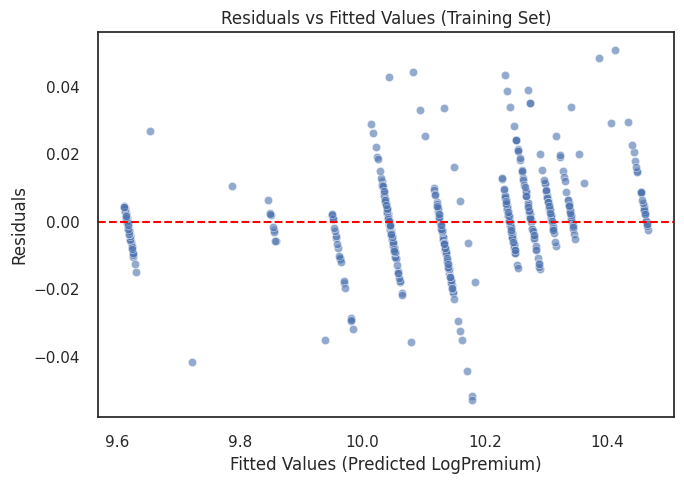

In [ ]:
train_residuals = y_train - train_pred
test_residuals  = y_test - test_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=train_pred, y=train_residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Fitted Values (Training Set)")
plt.xlabel("Fitted Values (Predicted LogPremium)")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()


# Business Recommendations Based on XGBoost Feature Importance

The final XGBoost model identifies Age, Chronic Disease status, Family Cancer History, and the BMI×Age interaction as the strongest predictors of medical insurance premiums. These results offer clear guidance for designing pricing policies, segmenting customer risk, and improving long-term cost management.

## 1. Prioritize Age as the Primary Determinant in Premium Pricing
Age contributes nearly half of the total feature importance, making it the single most influential predictor of expected medical cost.

### Recommendation
Premium pricing should be strongly age-adjusted. Insurers should maintain age-tiered pricing brackets and periodically update them to reflect emerging cost trends and demographic shifts.

## 2. Apply Risk-Based Adjustments for Individuals with Chronic Diseases
AnyChronicDiseases is the second most important predictor, indicating that the presence of chronic medical conditions significantly increases expected claim costs.

### Recommendation
Introduce structured premium adjustments for customers with chronic diseases. Complement these adjustments with disease-management programs to help reduce long-term expenditures.

## 3. Incorporate Family Cancer History into Underwriting Decisions
HistoryOfCancerInFamily is the third strongest predictor. Hereditary cancer risk has a measurable impact on predicted premiums.

### Recommendation
Underwriting processes should incorporate family cancer history as a formal risk factor. Preventive care initiatives and screening programs may be offered to customers with elevated hereditary risk.

## 4. Use the BMI×Age Interaction to Capture Compounding Risk
The BMI_Age interaction has substantially greater importance than BMI alone, indicating that weight-related risk increases significantly with age.

### Recommendation
Adopt combined age–BMI risk scoring in pricing models. Older individuals with elevated BMI should be placed in appropriately higher risk tiers.

## 5. Apply Additional Review for Individuals with Surgical or Transplant History
AnyTransplants and NumberOfMajorSurgeries contribute meaningfully to premium prediction. These factors reflect past high-cost medical events and signal ongoing health risks.

### Recommendation
Introduce premium loadings or supplemental underwriting review for individuals with prior major surgeries or transplant history. This helps ensure that premiums accurately capture long-term medical cost expectations.

## 6. Recognize Limited Predictive Value of BMI and Diabetes When Other Risk Factors Are Present
BMI and Diabetes have comparatively lower importance values. Their effects are partially absorbed by stronger indicators such as age and chronic disease load.

### Recommendation
BMI and diabetes should remain part of data collection but should not be overweighted in pricing calculations. Focus should remain on age and chronic health indicators for more accurate risk assessment.

## 7. Develop Preventive Care Strategies for High-Risk Groups Identified by the Model
Residual diagnostics indicate underprediction for individuals with multiple simultaneous high-risk characteristics.

### Recommendation
Implement preventive-care strategies, such as regular health screenings, chronic-disease management programs, and lifestyle support services, to stabilize long-term costs among high-risk customers.



# **Conclusion**

This project developed a comprehensive approach to predicting medical insurance premiums by combining exploratory data analysis, feature engineering, and advanced machine learning. The initial EDA revealed clear nonlinear patterns and interaction effects—particularly involving age, BMI, and medical history—that indicated a linear OLS model would be insufficient. Although OLS was explored, assumption checks and preliminary diagnostics confirmed that it could not capture the complexity of the data, making XGBoost a more suitable choice.

The final XGBoost model demonstrated strong predictive performance, with consistent results across training, testing, and 5-fold cross-validation, indicating minimal overfitting and reliable generalization. Feature importance analysis identified age, chronic disease status, and family cancer history as the primary drivers of premium variation, while the BMI×Age interaction and surgical history provided additional predictive strength. Traditional predictors like BMI and diabetes showed lower marginal importance once broader health indicators were included, reinforcing the value of using a nonlinear model capable of capturing complex relationships.

Residual diagnostics supported the model’s stability, revealing no major systematic errors and only slight underprediction for extreme high-risk cases. These insights translate into actionable business recommendations centered on age-adjusted pricing, chronic disease segmentation, integration of hereditary risk, and targeted preventive-care initiatives. Overall, the analysis demonstrates that a machine-learning-driven approach can significantly improve the accuracy and fairness of premium pricing while providing insurers with a deeper understanding of the health factors that drive long-term costs.
